In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz

In [ ]:
# path and file names of datasets
will_path = '/content/drive/MyDrive/TEMP/'
kevin_path =  '/content/drive/MyDrive/CSS 576/css576_final_project/Data/Balanced Data/'
file_names = ['balanced_trim_compiled_10.csv', 'balanced_trim_compiled_20.csv', 'balanced_trim_compiled_30.csv',
              'balanced_trim_compiled_40.csv', 'balanced_trim_compiled_50.csv', 'balanced_trim_compiled_60.csv',
              'balanced_trim_compiled_70.csv', 'balanced_trim_compiled_80.csv', 'balanced_trim_compiled_90.csv',
              'balanced_trim_compiled_100.csv', 'balanced_trim_compiled_145.csv', 'balanced_compiled.csv']

# Who is running right now?
PATH = will_path

# Finding the Rough Optimal Depth

In [ ]:
df = pd.read_csv(PATH + file_names[11])
X = df.drop(['spam'], axis=1)
y = df['spam']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# function to train decision trees
def decision_tree_train(_x_train, _y_train, _x_test, _y_test, _min_depth, _max_depth):
  progress = tqdm(total = (_max_depth - _min_depth + 1))
  total_result = {}

  for depth in range(_min_depth, _max_depth + 1):
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth).fit(_x_train, _y_train)
    
    y_pred = dt.predict(_x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f_score = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    result = {
        'accuracy': accuracy,
        'f_score': f_score,
        'recall': recall,
        'precision': precision
    }
    # store the result
    total_result[depth] = result
    progress.update(1)


  # convert the dict to pandas dataframe
  result_df = pd.DataFrame(columns=['depth', 'accuracy', 'f_score', 'recall', 'precision'])
  for depth in total_result.keys():
    result_df = pd.concat([result_df, pd.DataFrame({
        'depth': [depth],
        'accuracy': [total_result[depth]['accuracy']],
        'f_score': [total_result[depth]['f_score']],
        'recall': [total_result[depth]['recall']],
        'precision': [total_result[depth]['precision']]
    })])

  return result_df

In [ ]:
# train model with depths 1 through 100
total_result = decision_tree_train(X_train, y_train, X_test, y_test, 1, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
display(total_result)

,depth,accuracy,f_score,recall,precision
0,1,0.868832,0.866451,0.861097,0.871872
0,2,0.898876,0.900097,0.921898,0.879302
0,3,0.927455,0.926027,0.918932,0.933233
0,4,0.938935,0.938454,0.942165,0.934772
0,5,0.943332,0.942517,0.940188,0.944858
...,...,...,...,...,...
0,96,0.978261,0.977965,0.976273,0.979663
0,97,0.978261,0.977965,0.976273,0.979663
0,98,0.978261,0.977965,0.976273,0.979663
0,99,0.978261,0.977965,0.976273,0.979663


<Figure size 432x288 with 0 Axes>

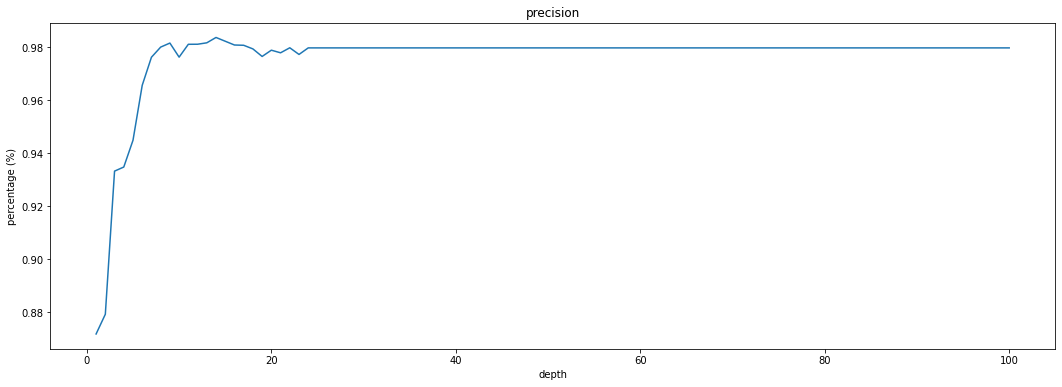

<Figure size 432x288 with 0 Axes>

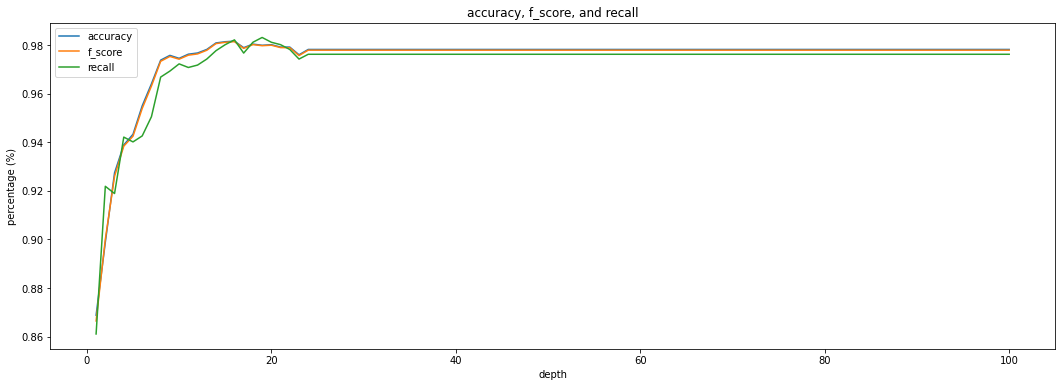

In [ ]:
# graph the metrics
plt.clf()
plt.figure(figsize=(18, 6))
plt.title('precision')
plt.plot(total_result['depth'], total_result['precision'])
plt.xlabel('depth')
plt.ylabel('percentage (%)')
plt.show()

plt.clf()
plt.figure(figsize=(18, 6))
plt.title('accuracy, f_score, and recall')
plt.plot(total_result['depth'], total_result['accuracy'], label='accuracy')
plt.plot(total_result['depth'], total_result['f_score'], label='f_score')
plt.plot(total_result['depth'], total_result['recall'], label='recall')
plt.xlabel('depth')
plt.ylabel('percentage (%)')
plt.legend()
plt.show()

# Finding the Optimal Number of Features

In [ ]:
result_df = pd.DataFrame(columns=['n_features', 'depth', 'accuracy', 'f_score', 'recall', 'precision'])

for i in range(0, 11):
  df = pd.read_csv(PATH + file_names[i])
  X = df.drop(['spam'], axis=1)
  y = df['spam']

  # split the data into training and testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  temp_result_df = decision_tree_train(X_train, y_train, X_test, y_test, 14, 14)

  file_name = file_names[i][:-4]
  n_features = file_name.split('_')[-1]
  temp_result_df['n_features'] = n_features
  
  result_df = pd.concat([result_df, temp_result_df])

  

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
display(result_df)

,n_features,depth,accuracy,f_score,recall,precision
0,10,14,0.956522,0.956071,0.957489,0.954657
0,20,14,0.973131,0.972786,0.971824,0.973749
0,30,14,0.971422,0.970946,0.966387,0.975549
0,40,14,0.973620,0.973188,0.968858,0.977556
0,50,14,0.972643,0.972112,0.964904,0.979428
0,60,14,0.972887,0.972381,0.965892,0.978958
0,70,14,0.975085,0.974702,0.971330,0.978099
0,80,14,0.974597,0.974168,0.969352,0.979031
0,90,14,0.972643,0.972125,0.965398,0.978947
0,100,14,0.974597,0.974283,0.973801,0.974765


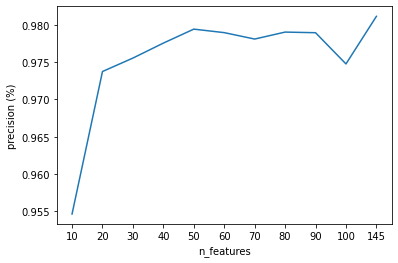

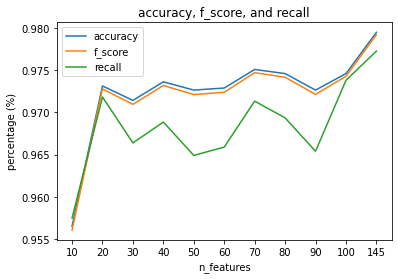

In [ ]:
plt.clf()
plt.plot(result_df['n_features'], result_df['precision'])
plt.xlabel('n_features')
plt.ylabel('precision (%)')
plt.show()

plt.clf()
# plt.figure(figsize=(18, 6))
plt.title('accuracy, f_score, and recall')
plt.plot(result_df['n_features'], result_df['accuracy'], label='accuracy')
plt.plot(result_df['n_features'], result_df['f_score'], label='f_score')
plt.plot(result_df['n_features'], result_df['recall'], label='recall')
plt.xlabel('n_features')
plt.ylabel('percentage (%)')
plt.legend()
plt.show()

# Hyperparameter Tuning through Grid Search

In [ ]:
df = pd.read_csv(PATH + file_names[11])

# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

X = df.drop(['spam'], axis=1)
y = df['spam']

In [ ]:
model = DecisionTreeClassifier(random_state=42)
params = {'splitter': ['best', 'random'],
          'max_depth': [i for i in range(8, 18)]}

In [ ]:
grid_search = GridSearchCV(model, params, scoring='precision', verbose=2)
grid_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................max_depth=8, splitter=best; total time=   0.5s
[CV] END .........................max_depth=8, splitter=best; total time=   0.5s
[CV] END .........................max_depth=8, splitter=best; total time=   0.5s
[CV] END .........................max_depth=8, splitter=best; total time=   0.5s
[CV] END .........................max_depth=8, splitter=best; total time=   0.5s
[CV] END .......................max_depth=8, splitter=random; total time=   0.1s
[CV] END .......................max_depth=8, splitter=random; total time=   0.2s
[CV] END .......................max_depth=8, splitter=random; total time=   0.1s
[CV] END .......................max_depth=8, splitter=random; total time=   0.2s
[CV] END .......................max_depth=8, splitter=random; total time=   0.1s
[CV] END .........................max_depth=9, splitter=best; total time=   0.5s
[CV] END .........................max_depth=9, 

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
                         'splitter': ['best', 'random']},
             scoring='precision', verbose=2)

In [ ]:
# print the best hyperparameters and resulting score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'max_depth': 12, 'splitter': 'best'}
Best score:  0.9750082537699184


# Best Model

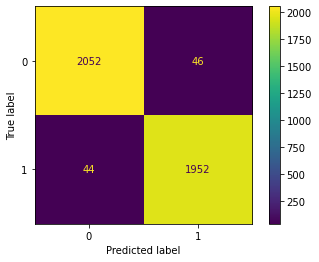

In [ ]:
df = pd.read_csv(PATH + file_names[11])
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop(['spam'], axis=1)
y = df['spam']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = DecisionTreeClassifier(max_depth=16, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
# print accuracy, f1, precision, recall for best model
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred, average='weighted'))
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.recall_score(y_test, y_pred, average='weighted'))

0.9780166096726918
0.9780168721478343
0.9780176016886227
0.9780166096726918


<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-18-354718257862>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ["Spam" if int(i) is 1 else "Ham"


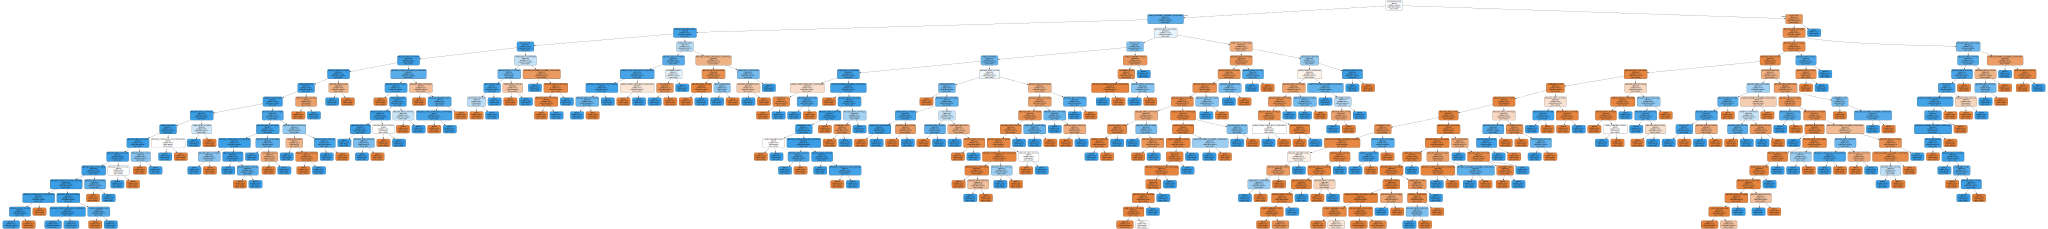

In [ ]:
# visualize the decision tree model
visualize_tree = tree.export_graphviz(best_model,    # Our tree
                                out_file=None,    # Output a string
                                filled=True,      # Color-code by ratio Survived (value)
                                rounded=True,     # Make the boxes rounded
                                proportion=True,  # Show samples %
                                node_ids=False,   # Give each node an ID number
                                special_characters=False, # Ignore special characters
                                precision=3,      # Limit decimal places
                                feature_names=X.columns, # Use our column names
                                class_names = (   # Label each node as Survived/Not Survived
                                    ["Spam" if int(i) is 1 else "Ham" 
                                     for i in y.unique()]),
                                )

graphviz.Source(visualize_tree, format="png")

In [ ]:
# saving the model to be used later
from joblib import dump

FILE_NAME = "modelv1.joblib"
dump(best_model, PATH + FILE_NAME)

['/content/drive/MyDrive/TEMP/modelv1.joblib']